In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
file_path = '/content/drive/MyDrive/20240819 CBCT MRI 데이터 정리 - 수정1.xlsx'

df = pd.read_excel(file_path, sheet_name='정리본')

# 'SEX (여성-F, 남성-M)' 컬럼명을 'SEX'로 변경
df.rename(columns={'SEX (여성-F, 남성-M)': 'SEX'}, inplace=True)
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})

# 빈문자열을 NaN으로 변경하기
df.replace("", np.nan, inplace=True)

columns = df.columns
print(len(columns))
print(columns)
df.head()

9
Index(['No.', 'Patient ID', 'NAME', 'SEX', 'AGE',
       'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)',
       'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)',
       'MRI_Rt OA (0=normal, 1=OA)', 'MRI_Lt OA (0=normal, 1=OA)'],
      dtype='object')


,No.,Patient ID,NAME,SEX,AGE,"CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)","CBCT_Lt OA (Osteoarthritis) (0=normal, 1=OA)","MRI_Rt OA (0=normal, 1=OA)","MRI_Lt OA (0=normal, 1=OA)"
0,1,20708532,사막동,0.0,68,1,1,NaN,NaN
1,2,20711690,이유진,0.0,23,0,0,NaN,NaN
2,3,20711556,이동규,1.0,26,1,1,NaN,NaN
3,4,20288547,지영선,1.0,66,0,0,NaN,NaN
4,5,20711599,배일웅,1.0,77,1,1,NaN,NaN


In [3]:
# 예제: 성별 및 나이 분포 계산 (사람별 기본 통계)
person_stats = df[['Patient ID', 'SEX', 'AGE']].drop_duplicates(subset='Patient ID')

# 성별 분포 확인
sex_distribution = df['SEX'].value_counts()

# 나이 분포 확인
age_distribution = df['AGE'].describe()

print("성별 분포:\n", sex_distribution)
print("나이 분포:\n", age_distribution)

성별 분포:
 SEX
0.0    856
1.0    362
Name: count, dtype: int64
나이 분포:
 count    1219.000000
mean       36.970468
std        18.655043
min        11.000000
25%        22.000000
50%        31.000000
75%        51.000000
max        90.000000
Name: AGE, dtype: float64


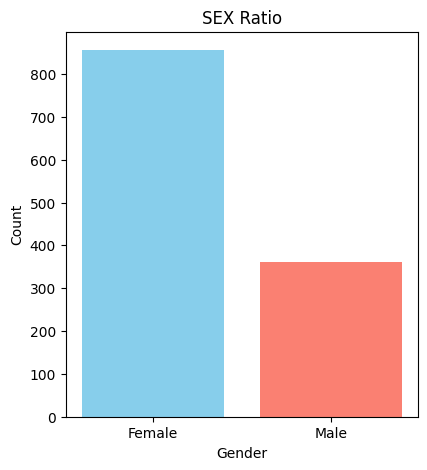

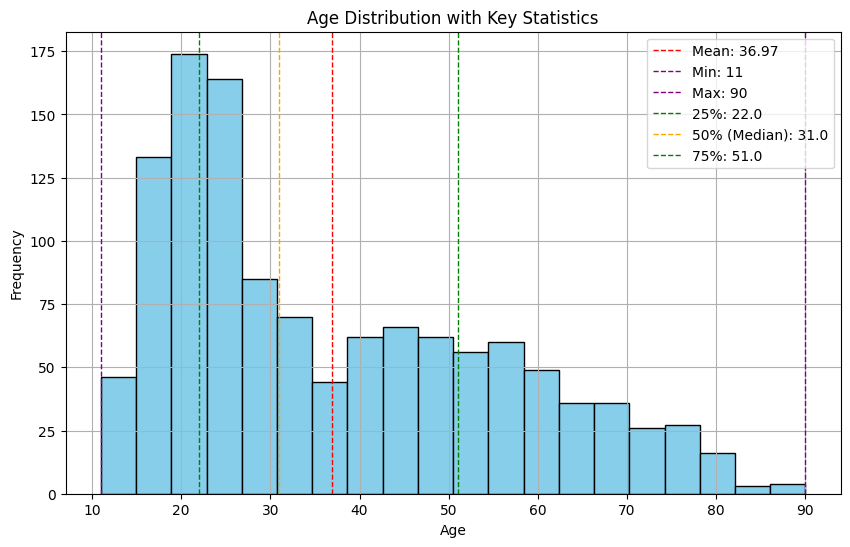

In [8]:
# 성별 분포 및 나이 분포 확인
sex_distribution = df['SEX'].value_counts()
age_distribution = df['AGE'].describe()

# 시각화
plt.figure(figsize=(10, 5))

# 성별 분포 그래프
plt.subplot(1, 2, 1)
plt.bar(['Female', 'Male'], sex_distribution, color=['skyblue', 'salmon'])
plt.title('SEX Ratio')
plt.xlabel('Gender')
plt.ylabel('Count')

# 나이 분포 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')  # 구간을 20개로 나눔

# 통계값 계산
mean_age = df['AGE'].mean()
min_age = df['AGE'].min()
max_age = df['AGE'].max()
q25 = df['AGE'].quantile(0.25)
median_age = df['AGE'].median()
q75 = df['AGE'].quantile(0.75)

# 주요 통계값 라인 추가
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='purple', linestyle='--', linewidth=1, label=f'Min: {min_age}')
plt.axvline(max_age, color='purple', linestyle='--', linewidth=1, label=f'Max: {max_age}')
plt.axvline(q25, color='green', linestyle='--', linewidth=1, label=f'25%: {q25}')
plt.axvline(median_age, color='orange', linestyle='--', linewidth=1, label=f'50% (Median): {median_age}')
plt.axvline(q75, color='green', linestyle='--', linewidth=1, label=f'75%: {q75}')

# 그래프 설정
plt.title('Age Distribution with Key Statistics')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 좌측 TMJ 데이터 생성
left_tmj = df[['Patient ID', 'SEX', 'AGE', 'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)']]
left_tmj = left_tmj.rename(columns={'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
left_tmj['TMJ_Side'] = 'Left'  # 좌측 TMJ로 구분

# 우측 TMJ 데이터 생성
right_tmj = df[['Patient ID', 'SEX', 'AGE', 'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)']]
right_tmj = right_tmj.rename(columns={'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
right_tmj['TMJ_Side'] = 'Right'  # 우측 TMJ로 구분

# 좌측, 우측 TMJ 데이터 합치기
tmj_data = pd.concat([left_tmj, right_tmj], ignore_index=True)

In [ ]:
# TMJ 상태별 성별 분포 분석
tmj_sex_distribution = tmj_data.groupby(['TMJ_Side', 'SEX', 'TMJ_OA_Status']).size()
print("TMJ 상태별 성별 분포:\n", tmj_sex_distribution)

# TMJ 상태별 나이 분포 분석
tmj_age_distribution = tmj_data.groupby(['TMJ_Side', 'TMJ_OA_Status'])['AGE'].describe()
print("\nTMJ 상태별 나이 분포:\n", tmj_age_distribution)

TMJ 상태별 성별 분포:
 TMJ_Side  SEX  TMJ_OA_Status
Left      0.0  0                419
               1                437
          1.0  0                223
               1                139
Right     0.0  0                476
               1                380
          1.0  0                234
               1                128
dtype: int64

TMJ 상태별 나이 분포:
                         count       mean        std   min   25%   50%    75%  \
TMJ_Side TMJ_OA_Status                                                         
Left     0              643.0  35.046656  17.355034  11.0  21.0  29.0  46.00   
         1              576.0  39.118056  19.802151  11.0  22.0  34.0  55.25   
Right    0              710.0  34.914085  17.404900  11.0  21.0  28.0  47.00   
         1              509.0  39.838900  19.936355  11.0  22.0  36.0  56.00   

                         max  
TMJ_Side TMJ_OA_Status        
Left     0              89.0  
         1              90.0  
Right    0              89.0  
 

In [ ]:
# 연령 그룹 설정
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

In [ ]:
# 좌측 TMJ 데이터 생성
left_tmj = df[['Patient ID', 'SEX', 'Age_Group', 'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)']]
left_tmj = left_tmj.rename(columns={'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
left_tmj['TMJ_Side'] = 'Left'  # 좌측 TMJ로 구분

# 우측 TMJ 데이터 생성
right_tmj = df[['Patient ID', 'SEX', 'Age_Group', 'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)']]
right_tmj = right_tmj.rename(columns={'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
right_tmj['TMJ_Side'] = 'Right'  # 우측 TMJ로 구분

# 좌측, 우측 TMJ 데이터 합치기
tmj_data = pd.concat([left_tmj, right_tmj], ignore_index=True)

In [ ]:
# TMJ 상태별 연령 그룹 및 성별 분포 계산
tmj_age_sex_distribution = tmj_data.groupby(['TMJ_Side', 'Age_Group', 'SEX'])['TMJ_OA_Status'].value_counts().unstack()
print("TMJ 상태별 연령 그룹 및 성별 분포:\n", tmj_age_sex_distribution)

TMJ 상태별 연령 그룹 및 성별 분포:
 TMJ_OA_Status             0    1
TMJ_Side Age_Group SEX          
Left     10s       0.0   67   68
                   1.0   44   33
         20s       0.0  126  104
                   1.0   93   47
         30s       0.0   53   45
                   1.0   33   17
         40s       0.0   68   61
                   1.0   22    9
         50s       0.0   54   76
                   1.0    9   11
         60s       0.0   25   44
                   1.0   13    9
         70s       0.0   19   30
                   1.0    9   12
         80s       0.0    7    8
                   1.0    0    1
         90s       0.0    0    1
                   1.0    0    0
Right    10s       0.0   75   60
                   1.0   54   23
         20s       0.0  144   86
                   1.0   96   44
         30s       0.0   59   39
                   1.0   35   15
         40s       0.0   67   62
                   1.0   15   16
         50s       0.0   76   54
                   

<ipython-input-28-f56bcf41dd50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmj_age_sex_distribution = tmj_data.groupby(['TMJ_Side', 'Age_Group', 'SEX'])['TMJ_OA_Status'].value_counts().unstack()


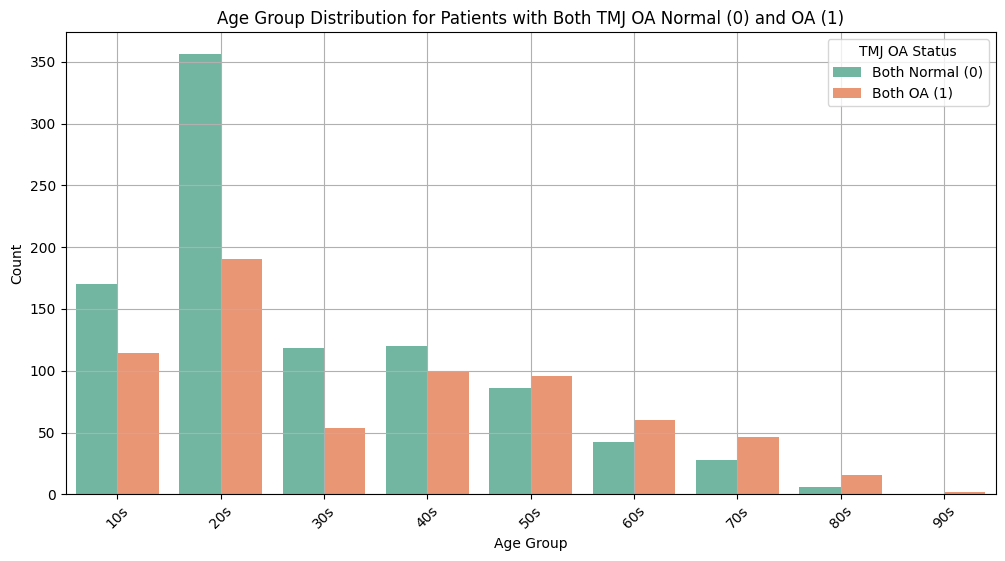

In [ ]:
# Right와 Left가 모두 0 (정상)인 경우 필터링
both_normal = tmj_data.groupby('Patient ID').filter(
    lambda x: (x['TMJ_OA_Status'] == 0).all()
)
both_normal['Status'] = 'Both Normal (0)'

# Right와 Left가 모두 1 (OA)인 경우 필터링
both_oa = tmj_data.groupby('Patient ID').filter(
    lambda x: (x['TMJ_OA_Status'] == 1).all()
)
both_oa['Status'] = 'Both OA (1)'

# 두 경우를 합치기
tmj_combined = pd.concat([both_normal, both_oa])

# Status별 Age_Group 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Status', data=tmj_combined, palette='Set2', dodge=True)
plt.title('Age Group Distribution for Patients with Both TMJ OA Normal (0) and OA (1)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='TMJ OA Status')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [ ]:
print(tmj_data.columns)# 전체 TMJ에서 TMJ OA=1 및 TMJ OA=0 개수 계산
total_tmj_counts = tmj_data['TMJ_OA_Status'].value_counts()
print("전체 TMJ OA 상태 분포 (TMJ OA=1, TMJ OA=0):\n", total_tmj_counts)

Index(['Patient ID', 'SEX', 'Age_Group', 'TMJ_OA_Status', 'TMJ_Side',
       'Gender'],
      dtype='object')
전체 TMJ OA 상태 분포 (TMJ OA=1, TMJ OA=0):
 TMJ_OA_Status
0    1353
1    1085
Name: count, dtype: int64


<ipython-input-35-3336aa8f0b1f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_tmj_counts.index, y=total_tmj_counts.values, palette='Set2')


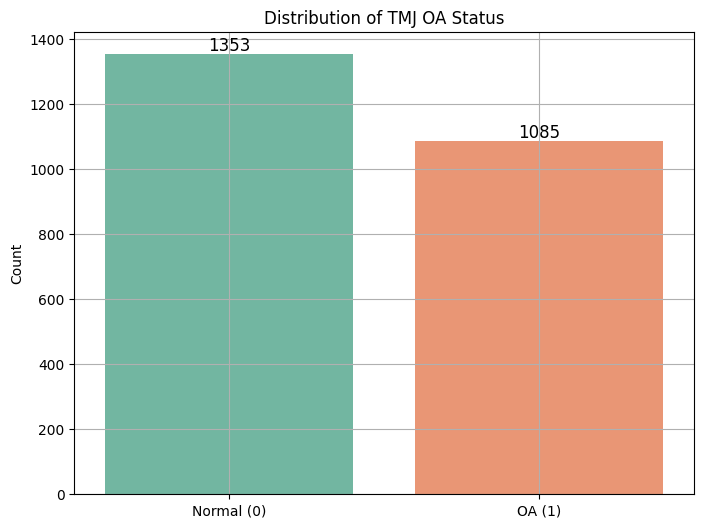

In [ ]:
# 전체 TMJ OA 상태 분포 계산
total_tmj_counts = tmj_data['TMJ_OA_Status'].value_counts()

# TMJ OA 상태 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=total_tmj_counts.index, y=total_tmj_counts.values, palette='Set2')
plt.title("Distribution of TMJ OA Status")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(total_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

plt.show()

In [ ]:
# 우측 TMJ에서 TMJ OA 상태 분포
right_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Right']['TMJ_OA_Status'].value_counts()
print("\n우측 TMJ OA 상태 분포:\n", right_tmj_counts)

# 좌측 TMJ에서 TMJ OA 상태 분포
left_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Left']['TMJ_OA_Status'].value_counts()
print("\n좌측 TMJ OA 상태 분포:\n", left_tmj_counts)


우측 TMJ OA 상태 분포:
 TMJ_OA_Status
0    710
1    509
Name: count, dtype: int64

좌측 TMJ OA 상태 분포:
 TMJ_OA_Status
0    643
1    576
Name: count, dtype: int64


<ipython-input-38-27d2e618698f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=right_tmj_counts.index, y=right_tmj_counts.values, palette='Blues')
<ipython-input-38-27d2e618698f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=left_tmj_counts.index, y=left_tmj_counts.values, palette='Greens')


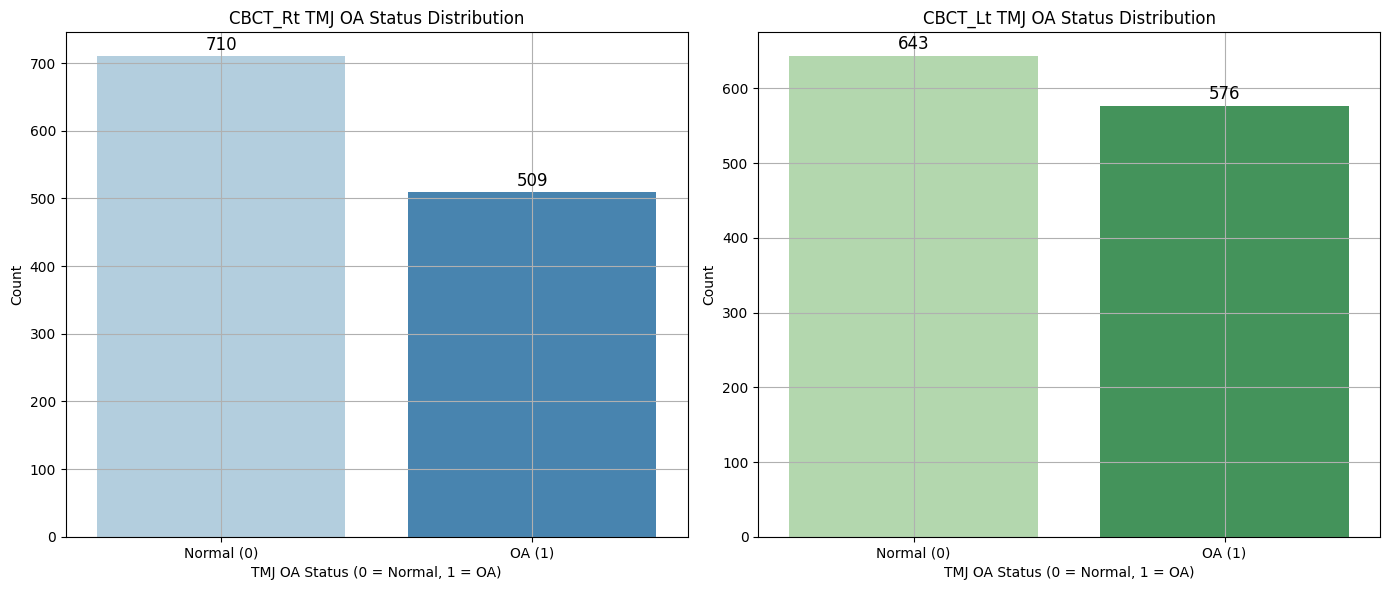

In [ ]:
# 우측 TMJ와 좌측 TMJ 상태 분포 계산
right_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Right']['TMJ_OA_Status'].value_counts()
left_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Left']['TMJ_OA_Status'].value_counts()

# 시각화
plt.figure(figsize=(14, 6))

# 1. 우측 TMJ OA 상태 분포 시각화
plt.subplot(1, 2, 1)
sns.barplot(x=right_tmj_counts.index, y=right_tmj_counts.values, palette='Blues')
plt.title("CBCT_Rt TMJ OA Status Distribution")
plt.xlabel("TMJ OA Status (0 = Normal, 1 = OA)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(right_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

# 2. 좌측 TMJ OA 상태 분포 시각화
plt.subplot(1, 2, 2)
sns.barplot(x=left_tmj_counts.index, y=left_tmj_counts.values, palette='Greens')
plt.title("CBCT_Lt TMJ OA Status Distribution")
plt.xlabel("TMJ OA Status (0 = Normal, 1 = OA)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(left_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()